In [2]:
import pandas as pd   
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree 
from sklearn.tree import export_text

In [108]:
# Memuat data dari file CSV 
df = pd.read_csv('C:\ASUS\LIA\social_ads.csv')

In [109]:
# Menampilkan beberapa baris pertama
print(df.head())

   Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0


In [110]:
# Menghitung jumlah nilai yang hilang
print(df.isnull().sum())

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


In [111]:
# Menghapus baris yang mengandung nilai yang hilang
df.dropna(inplace=True)

In [112]:
# Definisikan fitur dan target
X = df.drop('Purchased',axis=1)
y = df[['Purchased']]

In [172]:
# Membagi data menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [173]:
# Membuat model Decision Tree
model = DecisionTreeClassifier(criterion='gini',random_state=42,max_depth=3,min_samples_leaf=5)

In [174]:
# Melatih model dengan data pelatihan
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

In [183]:
# Membuat model Decision Tree
model = DecisionTreeClassifier(random_state=42)

In [190]:
# Prediksi label untuk data tes
y_pred = model.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0], dtype=int64)

In [186]:
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8375
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.88        52
           1       0.78      0.75      0.76        28

    accuracy                           0.84        80
   macro avg       0.82      0.82      0.82        80
weighted avg       0.84      0.84      0.84        80

Confusion Matrix:
[[46  6]
 [ 7 21]]


In [187]:
target=list(df['Purchased'].unique())
feature_names=list(X.columns)

In [188]:
r=export_text(model,feature_names=feature_names)
print(r)

|--- Age <= 44.50
|   |--- EstimatedSalary <= 90500.00
|   |   |--- Age <= 36.50
|   |   |   |--- class: 0
|   |   |--- Age >  36.50
|   |   |   |--- EstimatedSalary <= 83500.00
|   |   |   |   |--- EstimatedSalary <= 67500.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- EstimatedSalary >  67500.00
|   |   |   |   |   |--- Age <= 41.50
|   |   |   |   |   |   |--- EstimatedSalary <= 70500.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- EstimatedSalary >  70500.00
|   |   |   |   |   |   |   |--- Age <= 40.50
|   |   |   |   |   |   |   |   |--- EstimatedSalary <= 74500.00
|   |   |   |   |   |   |   |   |   |--- Age <= 39.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- Age >  39.50
|   |   |   |   |   |   |   |   |   |   |--- EstimatedSalary <= 71500.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- EstimatedSalary >  71500.00
|   |   |   |   |  

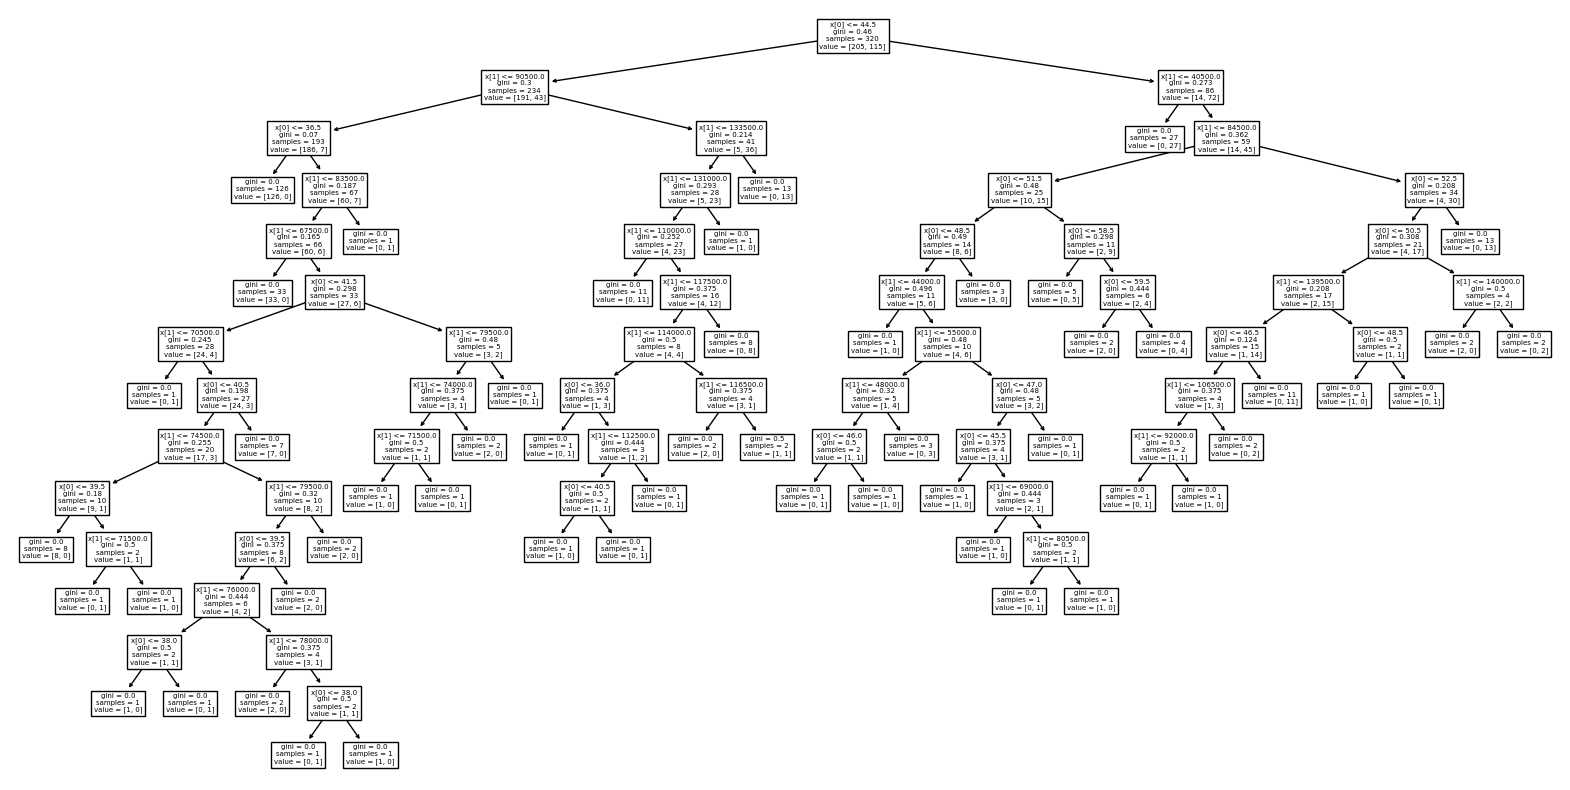

In [191]:
# Menampilkan Decision Tree
plt.figure(figsize=(20,10))
tree.plot_tree(model)
plt.show()